# Linear Algebra Background

## Introduction

In this chapter, we will give a rudimentary background on linear algebra. We will cover the basics of vectors, matrices, and tensor products with a very computational approach. We will refrain from introducing most of the mathematical formalism often encountered in a math course on linear algebra and we will avoid talking in depth about linear maps and the formal "*universal property*" definition of tensor products and focus again on a more computational and practical approach that will be useful for those who are are working on problems in software development, algorithms, and programming. There will be many examples throughout using Python and NumPy. This will also serve as a good introduction to some very basic usage of Python and NumPy for readers without a coding background. For a more advanced and theoretical treatment of tensors we will refer the reader to the Appendix on tensor networks. We will also provide some references to video lectures and other texts for the curious and adventurous reader at the end of the chapter. 

## Dependencies and Imports

### Installation of Packages
The packages we will need can be installed via pip:

In [1]:
pip install pennylane --upgrade

Requirement already up-to-date: pennylane in /Users/amelieschreiber/anaconda3/lib/python3.7/site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


### Importing Packages

For much of this section we will need to use complex numbers and a lot of linear algebra. To do this in a way this is compatible with quantum computing we will use \textbf{PennyLane} and the wrapped version of NumPy inside of PennyLane, so at the beginning of any Jupyter notebook or Python file import the following package:

In [2]:
# Read packages into Python library:
import pennylane as qml
from pennylane import numpy as np

This will allow us to create vectors, operators (matrices), and tensors that are complex valued, i.e. they have complex numbers as entries, and it will allow us to easily and quickly define unitary matrices which are fundamental to quantum computing and quantum mechanics in general. It is very important that we import NumPy as the wrapped version inside of PennyLane and not separately on its own. This ensures compatibility between the two packages. 

## Review of Complex Numbers
In this section, we review the basic algebra of complex numbers and give some Python code using the NumPy package. 

### Creating Complex Numbers and Arithmetic Operations
Creating complex numbers is very easy in Python using NumPy. We can create two complex numbers $z = 3+4j$ and $w = 1-1j$ using the NumPy library. Here, remember $j = \sqrt{-1}$ and $j^2 = -1$. Typically, in math textbooks, the imaginary number $j$ is instead denote by $i$, and complex numbers are usually written as $a+bi$ as apposed to $a+bj$. We will use both throughout the text, so it is important to get comfortable with both and be fluent in converting between the two notations. 

In [3]:
z = 3 + 4j
w = 1 - 1j

We can add the two complex numbers $z$ and $w$:

In [4]:
z+w

(4+3j)

We can also subtract the two complex numbers:

In [5]:
z-w

(2+5j)

Multiplying complex numbers in python is done as follows:

In [6]:
z*w

(7+1j)

We can print the real and imaginary parts of complex numbers as follows for $z = 3+4i:

In [7]:
print('z=', z)
print('Real(z)=', np.real(z))
print('Imag(Z)=', np.imag(z))

z= (3+4j)
Real(z)= 3.0
Imag(Z)= 4.0


Similarly for $w = 1-i$:

In [8]:
print('w=', w)
print('Real(w)=', np.real(w))
print('Imag(w)=', np.imag(w))

w= (1-1j)
Real(w)= 1.0
Imag(w)= -1.0


We can compute the **complex conjugates** $z^*$ and $w^*$, which just negates the imaginary part of the complex numbers as follows:

In [9]:
np.conj(z)

(3-4j)

In [10]:
np.conj(w)

(1+1j)

We can compute the **absolute value** of the complex numbers 

\begin{align} ||z|| &= \sqrt{zz^*} = \sqrt{|z|^2},\\ ||w|| &= \sqrt{ww^*} = \sqrt{|w|^2}, \end{align} 

In [11]:
print('||z||=', np.abs(z))

||z||= 5.0


In [12]:
print('||w||=', np.abs(w))

||w||= 1.4142135623730951


### Exercises

1. Compute the complex conjugate of the following complex numbers:
\begin{align}
u = 2-i, \quad z = 3+4i, \quad w = -9i
\end{align}

2. Compute the absolute value (or norm) of $u, z,$ and $w$.

3. Compute the absolute values using Python to check that they match your answers. Don't forget to use "$j$" instead of "$i$" in Python. 

## Vectors 

Vectors will be fundamental in our study of quantum computing. The most basic unit of computation in a quantum computer is a \emph{qubit}, which can be represented as a $2$-dimensional complex vector of length one. So understanding vectors will be foundational and necessary for most of what we will be doing in this book. Vectors can be thought of in many ways, one of the most basic is simply as an array of numbers, which we will often represent as a column of numbers called \textbf{column vectors}, but in some cases we will also need \textbf{row vectors}:\\


\begin{align} \text{Column Vector:} \ \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix}, \quad \quad \text{Row Vector:} \ \begin{pmatrix}
a_1, & a_2, & \cdots, & a_n
\end{pmatrix} \end{align}

We can create a column vector and a row vector in Python:

In [13]:
# Create a vector as a row
row_vector = np.array([2-1j, 7j, -3])

# Create a vector as a column
column_vector = np.array([[2+1j],
                          [-5],
                          [2j]])

Row vectors in quantum mechanics are also called **bra-vectors**, and are denoted as follows:

\begin{align} \langle A| = \begin{pmatrix}
a_1, & a_2, \cdots, & a_n
\end{pmatrix} \end{align}

Column vectors are also called **ket-vectors** in quantum mechanics denoted as follows:

\begin{align} |B\rangle = \begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix} \end{align}

In general, if we have a column vector, i.e. a ket-vector:

\begin{align} |A\rangle = \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix} \end{align}

the corresponding bra-vector:

\begin{align} \langle A| = \begin{pmatrix}
a_1^*, & a_2^*, & \cdots, & a_n^*
\end{pmatrix} \end{align}

is the **complex-conjugate transpose** of the ket-vector $|A\rangle$, and vice-versa. As an example, if we have the following ket-vector:


\begin{align} |A\rangle = \begin{pmatrix}
2+i \\ 1-3i
\end{pmatrix} \end{align}

then the corresponding bra-vector is:

\begin{align} \langle A| = \begin{pmatrix}
2-i, & 1+3i
\end{pmatrix} \end{align}

The notation $\langle A|$ and $|A\rangle$, for bra- and ket-vectors respectively, is a reference to \emph{inner products} denoted by brackets and we will discuss it more in the next section when we define inner product. As another example, we might want to have a pair of $2$-dimensional complex column vectors (meaning the entries are complex numbers):\\


\begin{align} |A \rangle = \begin{pmatrix}
2-i \\ 5
\end{pmatrix}, \quad \quad
|B \rangle = \begin{pmatrix}
7 \\ 3i
\end{pmatrix} \end{align}

Remember, $i^2 = -1$ and so $i = \sqrt{-1}$ is imaginary and complex numbers are always of the form $a + bi$. The corresponding bra-vectors would then be:

\begin{align} \langle A| = \begin{pmatrix}
2+i, & 5
\end{pmatrix}, \quad \quad \langle B| = \begin{pmatrix}
7, & -3i
\end{pmatrix} \end{align}

The $2$-dimensional vectors we have listed above are not quite the kind of vectors we will be using most often in quantum computing, but until we introduce the norm of a vector and explain what unit vectors are, let us focus on the basic operations we can perform on these vectors. We can always add two vector of the same dimension:

\begin{align} |A\rangle + |B\rangle = \begin{pmatrix}
2-i \\ 5
\end{pmatrix} + \begin{pmatrix}
7 \\ 3i
\end{pmatrix} = 
\begin{pmatrix}
(2-i) + 7 \\ 5 + 3i
\end{pmatrix} = 
\begin{pmatrix}
9-i \\ 5 + 3i
\end{pmatrix} \end{align}

In Python this can be done as follows:

In [14]:
ket_A = np.array([[2-1j],
                  [5]])
ket_B = np.array([[7], 
                  [-3j]])
print(ket_A + ket_B)

[[9.-1.j]
 [5.-3.j]]


We can multiply bra-vectors and ket-vectors by scalars:

$ 3|A\rangle = 3 \begin{pmatrix} 2-i\\5 \end{pmatrix} = \begin{pmatrix} 6-3i\\15 \end{pmatrix} $

In [15]:
print(3*ket_A)

[[ 6.-3.j]
 [15.+0.j]]


Similarly for row vectors (bra-vectors):

$ 5\langle B| = 5 \begin{pmatrix} 7, & 3i \end{pmatrix}  = \begin{pmatrix} 35, & 15i \end{pmatrix}$

In [16]:
bra_B = np.array([7, 3j])
print(5*bra_B)

[35. +0.j  0.+15.j]


## Inner Products and Norms of Vectors

The most important vectors we will encounter will be $2$-dimensional complex vector which are of length $1$. In this section we will define the **inner product** of two vectors, and the **norm** (length) of a vector which is derived from the inner product of the vector with itself. The vectors of length $1$ are sometimes referred to as **unit vectors**. We will discuss complex unit vectors in $2$-dimensional space $\mathbb{C}^2$ and how they relate to qubits. This will lead to a discussion of the **Bloch sphere** which will be a useful way of understanding qubits and how quantum gates act on them. 


### Inner Products
**Inner Products** are a more general case of the **dot-product**, but for most of our purposes, they can be thought of as the same thing. The most basic case of an inner product and the one we will use the most often can be thought of as the product of a row vector and a column vector of the same dimension:

\begin{align} \langle A| = \begin{pmatrix}
a_1, & a_2, & \cdots, & a_n
\end{pmatrix}, \quad \quad
|B\rangle = \begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix} \end{align}

Taking the inner product of $\langle A|$ and $|B\rangle$ gives the following:

\begin{align} \langle A| B \rangle &= \begin{pmatrix} 
a_1, & a_2, & \cdots, & a_n
\end{pmatrix}
\begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix}\\
&= 
a_1b_1 + a_2b_2 + \cdots + a_nb_n\\
&= \sum_{i=1}^n a_ib_i
\end{align}

As a basic example, take the inner product of the following $2$-dimensional vectors, 


\begin{align} \langle A| = \begin{pmatrix}
3i, & 2
\end{pmatrix}, \quad \quad |B\rangle = \begin{pmatrix}
5+2i \\ 1-i
\end{pmatrix} \end{align}

as follows:

\begin{align}
\langle A| B \rangle = \begin{pmatrix}
3i, & 2
\end{pmatrix}
\begin{pmatrix}
5+2i \\ 1-i
\end{pmatrix} &= 
3i(5+2i) + 2(1-i)\\ 
&= 15i-6+2-2i\\ 
&= -4+13i
\end{align}

In order to define a complex vector so that we can take its conjugate transpose, also called the **Hermitian conjugate**, we must define it as a **matrix**. So, suppose we have the following column vector (ket-vector):

\begin{align}
|A\rangle = \begin{pmatrix} 1-i \\ 3 \\ 2i \\ 5+i \end{pmatrix}
\end{align}

Then of course its **Hermitian conjugate** would be the bra-vector

\begin{align}
\langle A| = \begin{pmatrix}1+i, & 3, & -2i, & 5-i \end{pmatrix}
\end{align}

Now, in Python, we must remember to use "$j$" instead of $"i"$ for the imaginary unit and we must define the $4 \times 1$-matrix:

In [17]:
# Define the 4x1 matrix version of a column vector (instead of using the np.array() version):
A = np.matrix([[1-1j], 
               [3], 
               [2j], 
               [5+1j]])

# Compute the Hermitian Conjugate:
A.H

matrix([[1.+1.j, 3.-0.j, 0.-2.j, 5.-1.j]])

Now, to compute the inner product $ \langle A|A \rangle $ we can simple multiply the two matrix versions just computed:

In [18]:
np.dot(A.H, A)

matrix([[41.+0.j]])

Let's define another $4$-dimensional complex row vector $\langle B|$:

\begin{align}
\langle B| = \begin{pmatrix}
-3i, & 2+2i, & -6i, & -7
\end{pmatrix}
\end{align}

Once we have defined this bra-vector, let's compute the following inner products:

\begin{align}
\langle B|A \rangle, \quad \langle B|B \rangle, \quad \langle A|B \rangle.
\end{align}

In [19]:
# Define B as a 1x4 matrix
B = np.matrix([[-3j, 2+2j, -6j, -7]])

#Compute the Hermitian Conjugate of B, which is a ket-vector
B.H

matrix([[-0.+3.j],
        [ 2.-2.j],
        [-0.+6.j],
        [-7.-0.j]])

In [20]:
# Compute <B|A>
np.dot(B,A)

matrix([[-20.-4.j]])

In [21]:
# Compute <B|B>
np.dot(B, B.H)

matrix([[102.+0.j]])

In [22]:
# Compute <A|B>
np.dot(A.H, B.H)

matrix([[-20.+4.j]])

There is a different kind of product on two vectors which we will cover later called the **[outer product](https://en.wikipedia.org/wiki/Outer_product)**. The outer product is a specific case of the tensor product and is written in this case by $ |A\rangle \langle A|$. It is important to make this distinction now and note that the two **are not the same**. The **inner product** always yields a number, which can be complex valued if the two vectors are complex valued. The **outer product** in general gives a **matrix**. 

In [23]:
np.dot(A, A.H)

matrix([[ 2. +0.j,  3. -3.j, -2. -2.j,  4. -6.j],
        [ 3. +3.j,  9. +0.j,  0. -6.j, 15. -3.j],
        [-2. +2.j,  0. +6.j,  4. +0.j,  2.+10.j],
        [ 4. +6.j, 15. +3.j,  2.-10.j, 26. +0.j]])

For the more adventurous who understand how to multiply matrices, and to prepare for future computations where matrices are involved, we will compute a more general "inner product". If this does not make any sense to you and matrix multiplication is a foreign concept, we will discuss matrix multiplication in this chapter as a refresher, but now might be a good time to refresh your memory on how to multiply matrices if it is unfamiliar. When we discuss \emph{measurements} and \emph{expectation values} we will need to consider the case when there is a matrix in between the bra- and ket-vector. Take for example the Pauli-Z matrix, which we will discuss more later on:


\begin{align} Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \end{align}

Now take the following bra-vector and ket-vector


\begin{align} \langle A| = \begin{pmatrix}
i/\sqrt{2}, & -i/\sqrt{2}
\end{pmatrix}, \quad \quad |A\rangle = \begin{pmatrix}
-i/\sqrt{2} \\ i/\sqrt{2}
\end{pmatrix} \end{align}

Now, we can compute the following variation on the inner product

\begin{align}
\langle A| Z |A \rangle &= 
\begin{pmatrix}
i/\sqrt{2}, & -i/\sqrt{2}
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\begin{pmatrix}
-i/\sqrt{2} \\ i/\sqrt{2}
\end{pmatrix} \\
&= \begin{pmatrix}
i/\sqrt{2}, & -i/\sqrt{2}
\end{pmatrix}
\begin{pmatrix}
-i/\sqrt{2} \\ -i/\sqrt{2}
\end{pmatrix} \\
&= 1/2 - 1/2 \\
&= 0
\end{align}

We will encounter such calculations many more times when we discuss measurements and expectations. If this is a little confusing, it is not important to worry too much about it just yet. We will cover matrix multiplication shortly, and later we will discuss measurements and expectation values, at which point we should be comfortable computing more general version of this strange "inner product". 

### Exercises

1. Define the following ket-vector as an array in Python:

\begin{align}
|\psi \rangle = \begin{pmatrix} 2, & 3i \end{pmatrix}
\end{align}

2. Define $|\psi \rangle$ from the previous problem as a (column) matrix and compute its Hermitian conjugate. 

3. Compute the  following inner product by hand:
    
    $\begin{pmatrix}
    2, & 3i
    \end{pmatrix}
    \begin{pmatrix}
    1+i \\ 4
    \end{pmatrix}$ 

4. Write Python code to compute the previous inner product.

5. Compute the following inner product by hand:

    $ \begin{pmatrix}
    3i, & 1+2i, & 4, & 2i
    \end{pmatrix}
    \begin{pmatrix}
    5 \\ 1-2i \\ -3 \\ -i/2
    \end{pmatrix} $

6. Write Python code to compute the previous inner product. 

7. For the more adventurous who understand how to multiply matrices, and to prepare for future computations where matrices are involved, compute the following more general "inner product":

\begin{align}
\begin{pmatrix}1/\sqrt{2}, & -1/\sqrt{2} \end{pmatrix}
\begin{pmatrix} 1&0\\0&-1 \end{pmatrix}
\begin{pmatrix}1/\sqrt{2}\\ -1/\sqrt{2} \end{pmatrix}
\end{align}

## Norms and Lengths of Vectors

Using the inner product just discussed, we can define a **norm**, which gives us a notion of length for vectors:

\begin{align}
\sqrt{\langle A|A \rangle} = \sqrt{\sum_{i=1}^n a_i^*a_i}
\end{align}

In mathematical texts on linear algebra, vectors are often denote by lower-case bold letters and the norm is often written as $||\mathbf{v}|| = \sqrt{\mathbf{v}^*\mathbf{v}}$, where $\mathbf{v}^*$ is the conjugate transpose (bra-vector) of the ket-vector $\mathbf{v}$. We will use the physics notation throughout this book since it is more commonly used in quantum computing. 

Using Python to compute the norm, called the **Euclidean norm**, is very simple. Here we first define a ket-vector, compute its Hermitian conjugate, the compute the square root of the inner product:

In [24]:
A = np.matrix([[-2j], 
               [4+1j], 
               [-3], 
               [-6j]])

print(A.H)
print(np.dot(A.H, A))
print(np.sqrt(np.dot(A.H,A)))

[[-0.+2.j  4.-1.j -3.-0.j -0.+6.j]]
[[66.+0.j]]
[[8.1240384+0.j]]


All of this can be computed with a single function in NumPy:

In [25]:
print('The norm of |A> is:', np.linalg.norm(A))

The norm of |A> is: 8.12403840463596


Note, the norm of $\langle A|$ is equal to the norm of $|A\rangle$, which is easily seen from the formula defining the norm:

In [26]:
print('The norm of <A| is:', np.linalg.norm(A.H))

The norm of <A| is: 8.12403840463596


### Exercises

1. Compute the norm of 

\begin{align}
|\psi \rangle = \begin{pmatrix}
1 \\ -4i \\ 3+i \\ -7
\end{pmatrix}
\end{align}

by first defining it as a column matrix, computing the Hermitian conjugate "$A.H$", taking the inner product of $A.H$ and $A$ using the "np.dot()" function, and then computing the square root. 

2. Now, compute the norm of 

\begin{align}
|\psi \rangle = \begin{pmatrix}
1 \\ -4i \\ 3+i \\ -7
\end{pmatrix}
\end{align}

using the "np.linalg.norm()" function. 

## Qubits, the Bloch Sphere, and Basis States

Qubits are the basic unit of computation in a quantum computer, much like bits are the basic unit of computation in a "classical" computer. In bit based computing we have silicon chips with transistors which serve as "on/off" switches that serve as building blocks for complex systems of logic gates implementing Boolean logic. In a quantum computer, these "on/off" bits represented by strings of 0s and 1s are replaced by **qubits**. Qubits behave much differently from classical bits, but any classical computation involving bits can still be implemented on a quantum system of qubits. However, much more can be done qubits. They provide computational abilities that bits, classical computing, and classical information processing simply cannot replicate or accurately simulate. In some cases there are quantum information processes which provide a new paradigm for understanding information theory and computational complexity. Here we will focus on the basics and leave quantum complexity and subjects like entanglement entropy for the appendix at the end of the book on **tensor networks**. 

Qubits have many representations, the most common of them being as a $2$-dimensional complex unit vector: 

\begin{align}
|\psi \rangle = \begin{pmatrix}
\alpha \\ \beta
\end{pmatrix}, \quad \text{where } \sqrt{\langle \psi | \psi \rangle} = 1. 
\end{align}

From the condition that the vector be of length one, we can deduce the following:

\begin{align}
\sqrt{\langle \psi | \psi \rangle} &= \begin{pmatrix} \alpha^*, & \beta^* \end{pmatrix}\begin{pmatrix} \alpha \\ \beta \end{pmatrix} \\
&= \sqrt{\alpha^* \alpha+ \beta^* \beta}\\
&= \sqrt{|\alpha|^2 +|\beta|^2} = 1 \implies |\alpha|^2 +|\beta|^2 = 1. 
\end{align}

Remember, $\alpha$ and $\beta$ are complex numbers (elements of $\mathbb{C}$), and so the vector $|\psi \rangle \in \mathbb{C}^2$. The vectors representing qubit **[pure states](https://en.wikipedia.org/wiki/Quantum_state#Pure_states)** actually live on the **Riemann sphere** also called the **[complex projective line](https://en.wikipedia.org/wiki/Riemann_sphere#As_the_complex_projective_line)** $\mathbb{P}^1(\mathbb{C})$. 

The second representation, which comes from the representation of pure states as points on the Riemann sphere and that is very common in the literature and in software packages for quantum computing is via the **[Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere)**, named after the Nobel laureate and physicist [Felix Bloch](https://en.wikipedia.org/wiki/Felix_Bloch). Generally, the south pole represents the basis state 

\begin{align}
|0\rangle = \begin{pmatrix} 1\\0 \end{pmatrix}
\end{align}

![quantum_state_0.png](quantum_state_0.png)
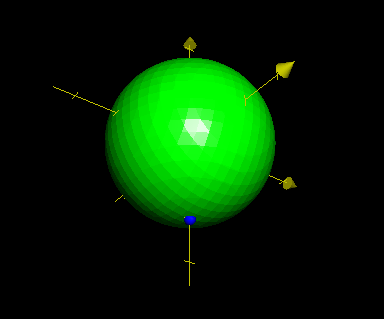

The north pole represents the basis state

\begin{align}
|1\rangle = \begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}

![quantum_state_1.png](quantum_state_1.png)

We can also form linear combinations of the two basis states:
    
\begin{align}
\alpha |0\rangle + \beta |1 \rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}
\end{align}

The coefficients $\alpha$ and $\beta$, which always satify the condition we derived $|\alpha|^2+|\beta|^2 = 1$, the corresponding point on the Bloch sphere will move to some other location. 

### Common Basis States

The $x$-axis, $y$-axis, and $z$-axis define three **bases** in which to perform computation. The $z$-axis is the standard computational basis. This is the "spin-up/spin-down" states and the other basis states can be defined in terms of this basis. Really any of the basis states can be defined in terms of the others, but generally one starts with the $z$-axis basis $|0\rangle$ and $|1\rangle$. 

#### Spin-up/Spin-down (z-axis)

\begin{align}
\text{spin-down}: \ |0\rangle &= \begin{pmatrix} 1\\0 \end{pmatrix} \\
\text{spin-up}: \ |1\rangle & = \begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}

#### Spin-right/Spin-left (x-axis)

\begin{align}
\text{spin-right}: \ |r\rangle &= \begin{pmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
\text{spin-left}: \ |l\rangle & = \begin{pmatrix} 1/\sqrt{2} \\ -1/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right)
\end{align}

#### Spin +/Spin - (y-axis)

\begin{align}
\text{spin +}: \ |+\rangle &= \begin{pmatrix} 1/\sqrt{2} \\ i/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle + i|1\rangle\right) \\
\text{spin -}: \ |-\rangle & = \begin{pmatrix} 1/\sqrt{2} \\ -i/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle - i|1\rangle\right)
\end{align}

#### Arbitrary Pure State

An arbitrary pure state is represented as some linear combination:

\begin{align}
|\psi \rangle =
\begin{pmatrix}
\alpha \\ \beta
\end{pmatrix} = \alpha |0\rangle + \beta |1\rangle
\end{align}

![Bloch_sphere.png](Bloch_sphere.png)
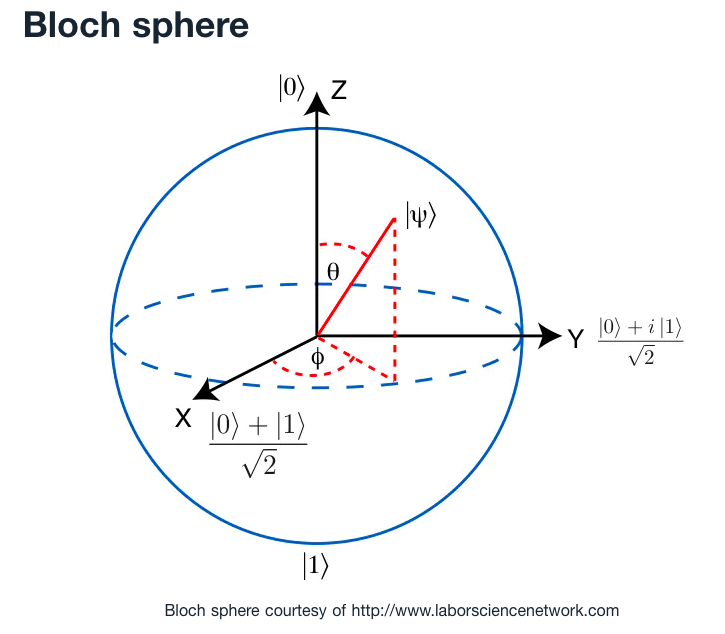

This image was taken from [Quantum Inspire](https://www.quantum-inspire.com/kbase/bloch-sphere/).

We can define the six basis states in Python as follows:

In [27]:
spin_down = np.matrix([[1], 
                       [0]])

spin_up = np.matrix([[0],
                     [1]])

spin_right = (1/np.sqrt(2))*(spin_down + spin_up)

spin_left = (1/np.sqrt(2))*(spin_down - spin_up)

spin_plus = (1/np.sqrt(2))*(spin_down + 1j*spin_up)

spin_minus = (1/np.sqrt(2))*(spin_down - 1j*spin_up)

print('spin down:', spin_down)
print('spin up:', spin_up)
print('spin right:', spin_right)
print('spin left:', spin_left)
print('spin plus:', spin_plus)
print('spin minus:', spin_minus)

spin down: [[1]
 [0]]
spin up: [[0]
 [1]]
spin right: [[0.70710678]
 [0.70710678]]
spin left: [[ 0.70710678]
 [-0.70710678]]
spin plus: [[0.70710678+0.j        ]
 [0.        +0.70710678j]]
spin minus: [[0.70710678+0.j        ]
 [0.        -0.70710678j]]


We can now compute inner products like $\langle 0|0 \rangle$ and $\langle l | r \rangle$:

In [28]:
np.dot(spin_down.H, spin_down)

matrix([[1]])

In [29]:
np.dot(spin_left.H, spin_right)

matrix([[0.]])

### Exercises

Use the above code defining the six basis states to compute:

1. $\langle 0 | 1 \rangle$
2. $\langle 1 | 0 \rangle$ 
3. $\langle 1 | 1 \rangle$
4. $\langle r | l \rangle$
5. $\langle l | r \rangle$
6. $\langle r | r \rangle$
7. $\langle l | l \rangle$
8. $\langle + | - \rangle$
9. $\langle + | r \rangle$
10. $\langle - | l \rangle$
11. $\langle 0 | r \rangle$
12. $\langle l | 1 \rangle$
13. $\langle 0 | + \rangle$
14. $\langle - | - \rangle$
15. $\langle - | r \rangle$

## Tensor Products of Vectors

One of the most common tensor products we will encounter throughout the following chapters of the book will be the tensor product of two qubits, which are represented by $2$-dimensional vector which have length (or "norm") $1$.

The general rule for the tensor product of two $2$-dimensional vectors is as follows:

\begin{align}
\begin{pmatrix}
a_1 \\ a_2
\end{pmatrix} \otimes
\begin{pmatrix}
b_1 \\ b_2
\end{pmatrix} = 
\begin{pmatrix}
a_1 \begin{pmatrix}
b_1 \\ b_2
\end{pmatrix} \\ a_2 \begin{pmatrix}
b_1 \\ b_2
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
a_1b_1 \\ a_1b_2 \\ a_2b_1 \\ a_2b_2
\end{pmatrix}
\end{align}

Here is a numerical example:

\begin{align}
\begin{pmatrix}
2 \\ 5
\end{pmatrix} \otimes 
\begin{pmatrix}
3 \\ 1
\end{pmatrix} = 
\begin{pmatrix}
2 \begin{pmatrix}
3 \\ 1
\end{pmatrix} \\ 5 \begin{pmatrix}
3 \\ 1
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
2 \cdot 3 \\ 2 \cdot 1 \\ 5 \cdot 3 \\ 5 \cdot 1
\end{pmatrix} = 
\begin{pmatrix}
6 \\ 2 \\ 15 \\ 5
\end{pmatrix}
\end{align}

For an example using Python we will use the "np.kron()" function, which is the [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product), 

> "In mathematics, the Kronecker product, sometimes denoted by ⊗, is an operation on two matrices of arbitrary size resulting in a block matrix. It is a generalization of the outer product (which is denoted by the same symbol) from vectors to matrices, and gives the matrix of the tensor product with respect to a standard choice of basis. The Kronecker product should not be confused with the usual matrix multiplication, which is an entirely different operation."

In [30]:
# Define two ket-vectors

A = np.array([[2], 
              [5]])

B = np.array([[3],
              [1]])

# Take the Kronecker (tensor) product of the two column vectors
np.kron(A,B)

array([[ 6],
       [ 2],
       [15],
       [ 5]])

We can also define these two vectors as matrices which will allow us to compute Hermitian conjugates. The Kronecker product function 'np.kron()' will work all the same:

In [31]:
# Define the ket-vectors as 2x1 column matrices:
ket_A = np.matrix([[2], 
                   [5]])

ket_B = np.matrix([[3], 
                   [1]])

# Compute their Kronecker product
np.kron(ket_A, ket_B)

matrix([[ 6],
        [ 2],
        [15],
        [ 5]])

This can also be done with complex vectors:

In [32]:
# Define the ket-vectors as 2x1 column matrices:
ket_psi = np.matrix([[2-1j], 
                     [3j]])

ket_phi = np.matrix([[-3], 
                     [4-2j]])

# Compute their Kronecker product
np.kron(ket_psi, ket_phi)

matrix([[-6. +3.j],
        [ 6. -8.j],
        [-0. -9.j],
        [ 6.+12.j]])

Here is a more complicated example with two vectors of different dimensions:


\begin{align}
\begin{pmatrix}
a_1 \\ a_2
\end{pmatrix} \otimes 
\begin{pmatrix}
b_1 \\ b_2 \\ b_3
\end{pmatrix} = 
\begin{pmatrix}
a_1 \begin{pmatrix}
b_1 \\ b_2 \\ b_3
\end{pmatrix} \\
a_2 \begin{pmatrix}
b_1 \\ b_2 \\ b_3
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
a_1b_1 \\ a_1b_2 \\ a_1b_3 \\ a_2b_1 \\ a_2b_2 \\ a_2b_3
\end{pmatrix}
\end{align}

Here is a corresponding numerical example:

\begin{align}
\begin{pmatrix}
1 \\ 4
\end{pmatrix} \otimes 
\begin{pmatrix}
5 \\ 2 \\ 4
\end{pmatrix} = 
\begin{pmatrix}
1 \begin{pmatrix}
5 \\ 2 \\ 4
\end{pmatrix} \\
4 \begin{pmatrix}
5 \\ 2 \\ 4
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
5 \\ 2 \\ 4 \\ 20 \\ 8 \\ 16
\end{pmatrix}
\end{align} 

Here is the code for computing this tensor product:

In [33]:
ket_X = np.matrix([[1], 
                   [4]])

ket_Y = np.matrix([[5], 
                   [2], 
                   [4]])

np.kron(ket_X, ket_Y)

matrix([[ 5],
        [ 2],
        [ 4],
        [20],
        [ 8],
        [16]])

### Exercises

1. Using the following rule, 
\begin{align}
\begin{pmatrix}
a_1 \\ a_2 \\ a_3
\end{pmatrix} \otimes
\begin{pmatrix}
b_1 \\ b_2
\end{pmatrix} = 
\begin{pmatrix}
a_1 \begin{pmatrix}
b_1 \\ b_2
\end{pmatrix} \\ a_2\begin{pmatrix}
b_1 \\ b_2
\end{pmatrix} \\ a_3\begin{pmatrix}
b_1 \\ b_2
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
a_1b_1 \\ a_1b_2 \\ a_2b_1 \\ a_2b_2 \\ a_3b_1 \\ a_3b_2
\end{pmatrix}
\end{align}

compute the following tensor/Kroneckar product by hand:

\begin{align}
\begin{pmatrix}
2 \\ 7 \\ 3
\end{pmatrix} \otimes
\begin{pmatrix}
5 \\ 9
\end{pmatrix}
\end{align}


2. Write Python code to compute the above computation using the 'np.kron()' function. Remember to define two column (ket) vectors as matrices first.  

3. Derive a general rule for the following tensor product by performing the tensor product inside the parenthesis first:

\begin{align}
\left( \begin{pmatrix}
a_1 \\ a_2
\end{pmatrix} \otimes 
\begin{pmatrix}
b_1 \\ b_2
\end{pmatrix}\right) \otimes 
\begin{pmatrix}
c_1 \\ c_2
\end{pmatrix}
\end{align}

4. Now derive a general rule for the following tensor product by performing the tensor product in the parenthesis first:

\begin{align}
\begin{pmatrix}
a_1 \\ a_2
\end{pmatrix} \otimes 
\left( \begin{pmatrix}
b_1 \\ b_2
\end{pmatrix} \otimes 
\begin{pmatrix}
c_1 \\ c_2
\end{pmatrix}\right)
\end{align}

Convince yourself that your results from the previous two computations are in fact equal.

5. Write Python code to compute $|0\rangle \otimes |0 \rangle $. 
6. Write Python code to compute $|0\rangle \otimes |1 \rangle $. 
7. Write Python code to compute $|1\rangle \otimes |0 \rangle $.
8. Write Python code to compute $|1\rangle \otimes |1 \rangle $.

## Preparing Basis States in PennyLane

In PennyLane, and other quantum computing software, we often want to prepare basis states. This is something we will return to again in the future when we study specific cases of quantum circuits, but having some basic introduction to state preparation now seems appropriate since the are simply tensor products of the basis states $|0\rangle$ and $|1\rangle$. In particular, we can prepare states like

\begin{align}
|00 \rangle &= |0\rangle \otimes |0\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 1\\0\\0\\0 \end{pmatrix} \\
|01 \rangle &= |0\rangle \otimes |1\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\1\\0\\0 \end{pmatrix} \\
|10 \rangle &= |1\rangle \otimes |0\rangle = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 0\\0\\1\\0 \end{pmatrix} \\
|11 \rangle &= |1\rangle \otimes |1\rangle = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\0\\0\\1 \end{pmatrix}
\end{align}

In [34]:
# Define the basis states:

down_down = np.kron(spin_down, spin_down)
down_up = np.kron(spin_down, spin_up)
up_down = np.kron(spin_up, spin_down)
up_up = np.kron(spin_up, spin_up)

# Print the first state:
print('|00> =')
print(down_down)

|00> =
[[1]
 [0]
 [0]
 [0]]


In [35]:
# Print the second state:
print('|01> =')
print(down_up)

|01> =
[[0]
 [1]
 [0]
 [0]]


In [36]:
# Print the third state:
print('|10> =') 
print(up_down)

|10> =
[[0]
 [0]
 [1]
 [0]]


In [37]:
# Print the fourth state:
print('|11> =') 
print(up_up)

|11> =
[[0]
 [0]
 [0]
 [1]]


Taking this further, we can define states like:
    
\begin{align}
|000\rangle = |0\rangle \otimes |0\rangle \otimes |0\rangle = \begin{pmatrix} 1\\0\\0\\0\\0\\0\\0\\0 \end{pmatrix}
\end{align}

\begin{align}
|010\rangle = |0\rangle \otimes |1\rangle \otimes |0\rangle = \begin{pmatrix} 0\\0\\1\\0\\0\\0\\0\\0 \end{pmatrix}
\end{align}

In PennyLane the following code prepares defines a device (quantum computer or simulator) on which to run code. We will use the default simulator for now since the code is very simple and running it on an actual quantum computer is unnecessary:

In [38]:
dev = qml.device("default.qubit", wires=2, shots=1)

Now we can define an array that corresponds to the basis state $|00\rangle$:

In [39]:
dd = np.array([0, 0])

Now, we define a 'qnode' in PennyLane that samples the qubits and gives a $+1$ for spin-down and a $-1$ for spin up:

In [40]:
@qml.qnode(dev)
def circuit():
    qml.BasisState(dd, wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

[[1]
 [1]]


The vector above show a $+1$ in the first and second entry meaning it is measuring two spin-up states. Let's define a new state to prepare corresponding to $|01 \rangle$:

In [41]:
du = np.array([0,1])

Next, let's define a new 'qnode' do sample corresponding to this prepared state:

In [42]:
@qml.qnode(dev)
def circuit():
    qml.BasisState(du, wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

[[ 1]
 [-1]]


As we can see, we get a $+1$ in the first component, corresponding to the spin-down state, and we get a $-1$ in the second component corresponding to the spin-up state. We can also tell PennyLane to perform multiple "shots" or samples:

In [43]:
dev2 = qml.device("default.qubit", wires=2, shots=10)

If we define a new array corresponting to the state $|11\rangle$:

In [44]:
uu = np.array([1,1])

We can define a new 'qnode' with the new device we just defined, and we should expect an output vector of 

\begin{align}
\begin{pmatrix}
-1\\-1
\end{pmatrix}
\end{align}

ten times, corresponding to the ten samples:

In [45]:
@qml.qnode(dev2)
def circuit():
    qml.BasisState(uu, wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


We will return to this when we discuss measurements and expectation values. 

### Exercises

#### Write code to compute the following basis states:

1. $|000 \rangle$
2. $|001 \rangle$
3. $|010 \rangle$
4. $|011 \rangle$
5. $|100 \rangle$
6. $|101 \rangle$
7. $|110 \rangle$
8. $|111 \rangle$

Now, compute these by hand to verify your code is correct. For example, the first computation will be

\begin{align}
\begin{pmatrix} 1\\0 \end{pmatrix} \otimes
\begin{pmatrix} 1\\0 \end{pmatrix} \otimes
\begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}

9. Define a defaul device with "3 wires" and "5 shots".
10. Define an array 'uud' for the basis state $|001\rangle$.
11. Now define a 'qnode' that will print the samples: 
> qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1)), qml.sample(qml.PauliZ(2))
12. Run your 'qnode' and verify that you get the output vector
\begin{align}
\begin{pmatrix}
1 \\ 1 \\ -1
\end{pmatrix}
\end{align}

five times.

13. Try doing this with the other basis states given in Exercises 1-8.

## Matrices

Matrices form the foundation for quantum gates, which are just operations on qubits that move the points around the Bloch sphere. Matrices are also called operators and (quantum) gates. They can operate on a single qubit, or on many qubits simultaneously. The operators (or matrices or gates) we will be using most are known as *unitary operators* or *unitary matrices*. In this section we will discuss basic matrix algebra and define unitary matrices. 

We have already seen two ways or realizing matrices in Python. Suppose we have the following $2 \times 2$ matrix

\begin{align}
M = \begin{pmatrix}
2-i & -3 \\
-5i & 2
\end{pmatrix}
\end{align}

We can define this matrix as an array, or as a matrix in Python:

In [46]:
M = np.array([[2-1j, -3],
              [-5j, 2]])

print(M)

[[ 2.-1.j -3.+0.j]
 [-0.-5.j  2.+0.j]]


In [47]:
M = np.matrix([[2-1j, -3],
               [-5j, 2]])

print(M)

[[ 2.-1.j -3.+0.j]
 [-0.-5.j  2.+0.j]]


We will use the second version, the matrix version, so that we can again take Hermitian conjugates of the matrices, which is again given by the conjugate transpose:

In [48]:
print(M.H)

[[ 2.+1.j -0.+5.j]
 [-3.-0.j  2.-0.j]]


This transposes the matrix and conjugates all of its entries. We can also multiply matrices so long as the dimensions match appropriately. In particular, to multiply two matrices $A$ and $B$, the matrix must be an $n \times p$ matrix and the matrix $B$ must be a $p \times m$ matrix. The result is an $n \times m$ matrix. For example:

In [49]:
# Define a 3x2 matrix:
A = np.matrix([[2j, -5],
               [3-5j, 1], 
               [5, 4j]])

# Define a 2x4 matrix:
B = np.matrix([[1, -3j, 5, 2], 
               [1-1j, 1, 3, 7j]])

#Taking the product of a (3x2) and (2x4) matrix will give a 3x4 matrix:
np.dot(A, B)

matrix([[ -5. +7.j,   1. +0.j, -15.+10.j,   0.-31.j],
        [  4. -6.j, -14. -9.j,  18.-25.j,   6. -3.j],
        [  9. +4.j,   0.-11.j,  25.+12.j, -18. +0.j]])

If we are using the matrix definition instead of the array definition we can also multiply the two matrices as follows:

In [50]:
A*B

matrix([[ -5. +7.j,   1. +0.j, -15.+10.j,   0.-31.j],
        [  4. -6.j, -14. -9.j,  18.-25.j,   6. -3.j],
        [  9. +4.j,   0.-11.j,  25.+12.j, -18. +0.j]])

If we define the two matrices as arrays, this will not work and will return an error. 

### Exercises

#### Define the following four matrices

\begin{align}
I = \begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}, \quad
X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix}, \quad
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix}
\end{align}

#### Write Python code to compute the following matrix multiplications:

1. $XY$
2. $YX$
3. $YZ$
4. $ZY$
5. $HX$
6. $YH$
7. $XYZ$
8. $YZX$
9. $ZXY$
10. $XHY$

## Tensor Products of Matrices

In this section we will discuss how to take tensor products of matrices in order to later build quantum gates that operate on many qubits at once. Understanding the basics of tensor products of matrices is fundamental to understanding quantum logic gates and quantum circuits. For the tensor product of two $2 \times 2$ matrices, the general rule is as follows:

\begin{align}
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix} \otimes 
\begin{pmatrix}
x & y \\
z & w
\end{pmatrix} = 
\begin{pmatrix}
a \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} & b \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} \\
c \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} & d \begin{pmatrix}
x & y \\
z & w
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
ax & ay & bx & by \\
az & aw & bz & bw \\
cx & cy & dx & dy \\
cz & cw & dz & dw
\end{pmatrix}
\end{align}

Here is a basic numerical example:

\begin{align}
\begin{pmatrix}
2 & 3 \\
6 & 1
\end{pmatrix} \otimes
\begin{pmatrix}
7 & 10 \\
9 & 4
\end{pmatrix} = 
\begin{pmatrix}
2 \begin{pmatrix}
7 & 10 \\
9 & 4
\end{pmatrix}& 3\begin{pmatrix}
7 & 10 \\
9 & 4
\end{pmatrix} \\
6\begin{pmatrix}
7 & 10 \\
9 & 4
\end{pmatrix} & 1\begin{pmatrix}
7 & 10 \\
9 & 4
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
14 & 20 & 21 & 30 \\
18 & 8 & 27 & 12 \\
42 & 60 & 7 & 10 \\
54 & 24 & 9 & 4
\end{pmatrix}
\end{align}

We can again use the 'np.kron()' function to perform this computation in Python:

In [51]:
A = np.matrix([[2, 3],
               [6, 1]])

B = np.matrix([[7, 10], 
               [9, 4]])

np.kron(A,B)

matrix([[14, 20, 21, 30],
        [18,  8, 27, 12],
        [42, 60,  7, 10],
        [54, 24,  9,  4]])

In quantum computing, if we have basis states such as

\begin{align}
|010\rangle &= |0\rangle \otimes |1\rangle \otimes |0\rangle \\
&= \begin{pmatrix}
1\\0
\end{pmatrix} \otimes 
\begin{pmatrix}
0\\1
\end{pmatrix} \otimes 
\begin{pmatrix}
1\\0
\end{pmatrix} \\
&= \begin{pmatrix}
0\\0\\1\\0\\0\\0\\0\\0
\end{pmatrix}
\end{align}

we can operate on them using tensor product of operators. In particular, to operate on a three qubit basis state such at this, we need the tensor product of three $2 \times 2$ matrix. For example, with the following four operators:

\begin{align}
I = \begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}, \quad
X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix}, \quad
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix}
\end{align}

We can form tensor product such as $H \otimes X \otimes I$ and $Z \otimes Z \otimes H$, and any other three matrix combination you might dream up. Let's define a basis state $|01\rangle$ and compute a few operators that will operate on this basis state:

In [52]:
#Define the basis state |01>
du = np.kron(spin_down, spin_up)
print(du)

[[0]
 [1]
 [0]
 [0]]


In [53]:
# Define the matrices X, Y, Z, and H
X = np.matrix([[0, 1],
               [1, 0]])

Y = np.matrix([[0, -1j], 
               [1j, 0]])

Z = np.matrix([[1, 0],
               [0, -1]])

H = (1/np.sqrt(2))*np.matrix([[1, 1], 
                          [1, -1]])

Now let's comute the following four tensor products:

\begin{align}
X \otimes Y, \quad X \otimes Z, \quad H \otimes H
\end{align}

In [54]:
print(np.kron(X, Y))

[[0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]


In [55]:
print(np.kron(X, Z))

[[ 0  0  1  0]
 [ 0  0  0 -1]
 [ 1  0  0  0]
 [ 0 -1  0  0]]


In [56]:
print(np.kron(H, H))

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


Now, we can compute the action of these matrices on $|01\rangle$ as:

\begin{align}
(X \otimes Y)(|01\rangle) = (X \otimes Y)(|0\rangle \otimes |1\rangle) = X|0\rangle \otimes Y|1\rangle 
\end{align}

\begin{align}
(X \otimes Z)(|01\rangle) = (X \otimes Z)(|0\rangle \otimes |1\rangle) = X|0\rangle \otimes Z|1\rangle 
\end{align}

\begin{align}
(H \otimes H)(|01\rangle) = (H \otimes H)(|0\rangle \otimes |1\rangle) = H|0\rangle \otimes H|1\rangle 
\end{align}

In [57]:
XY = np.kron(X, Y)
XZ = np.kron(X, Z)
HH = np.kron(H, H)

In [58]:
print(XY * du)

[[0.+0.j]
 [0.+0.j]
 [0.-1.j]
 [0.+0.j]]


In [59]:
print(XZ * du)

[[ 0]
 [ 0]
 [ 0]
 [-1]]


In [60]:
print(HH * du)

[[ 0.5]
 [-0.5]
 [ 0.5]
 [-0.5]]


### Exercises

1. Compute the following tensor product by hand:

\begin{align}
\begin{pmatrix}
11 & 2 \\
3 & 5
\end{pmatrix} \otimes
\begin{pmatrix}
7 & 8 \\ 
0 & 1
\end{pmatrix}
\end{align}

#### Compute the following tensor products by hand:

2. $X \otimes X$
3. $Z \otimes Y$
4. $H \otimes X$

#### Write Python code to compute the tensor products:

5. $X \otimes X$
6. $Z \otimes Y$
7. $H \otimes X$
8. $H \otimes H$

9. Write Python code to verify that $(H \otimes H) \otimes H = H \otimes (H \otimes H)$. 

#### Use the following code defining the basis state $|010 \rangle $ and the relevant tensor products to compute the following: 

10. $(X \otimes X \otimes Y)|010 \rangle$
11. $(X \otimes Z \otimes H)|010 \rangle$
12. $(H \otimes H \otimes H)|010 \rangle$

In [61]:
# Define the matrices X, Y, Z, and H:
X = np.matrix([[0, 1],
               [1, 0]])

Y = np.matrix([[0, -1j], 
               [1j, 0]])

Z = np.matrix([[1, 0],
               [0, -1]])

H = (1/np.sqrt(2))*np.matrix([[1, 1], 
                              [1, -1]])

# Define the following tensor products:
XY = np.kron(X, Y)
XZ = np.kron(X, Z)
HH = np.kron(H, H)

# Define the following additional tensor products:
XXY = np.kron(X, XY)
XZH = np.kron(XZ, H)
HHH = np.kron(HH, H)

# Define the basis state:
dud = np.kron(down_up, spin_down)

## Quantum Logic Gates

In this section we will discuss a list of the most commonly used [quantum logic gates](https://en.wikipedia.org/wiki/Quantum_logic_gate#Square_root_of_NOT_gate_(%E2%88%9ANOT)) in quantum computing. This will include the Pauli operators, the Hadamard gate, phase gates, controlled-U gates for various unitary operators, swap operators, and the Toffoli gate. 

> "In quantum computing and specifically the quantum circuit model of computation, a quantum logic gate (or simply quantum gate) is a basic quantum circuit operating on a small number of qubits. They are the building blocks of quantum circuits, like classical logic gates are for conventional digital circuits."

> "Unlike many classical logic gates, quantum logic gates are reversible. However, it is possible to perform classical computing using only reversible gates. For example, the reversible Toffoli gate can implement all Boolean functions, often at the cost of having to use ancilla bits. The Toffoli gate has a direct quantum equivalent, showing that quantum circuits can perform all operations performed by classical circuits."

### The Pauli X, Y, and Z gates:

\begin{align}
X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix}, \quad
\end{align}

### The Identity Operator and the Hadamard Gate:

\begin{align}
I = \begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}, \quad
\text{Hadamard Gate:} \ \ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix}
\end{align}

### The Phase Gate

\begin{align}
S = 
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\end{align}

### Controlled-NOT (CNOT or CX)


\begin{align}
CX &= \begin{pmatrix} I & 0 \\ 0 & X \end{pmatrix} = 
\begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\end{align}

### Controlled-Z (CZ)

\begin{align}
CZ &= \begin{pmatrix} I & 0 \\ 0 & Z \end{pmatrix} = 
\begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
\end{align}

### Controlled-U (CU)

Let $U = \begin{pmatrix} u_{11} & u_{12} \\ u_{21} & u_{22} \end{pmatrix}$ be any unitary matrix operator. Then we have the following gates:

\begin{align}
CU &= \begin{pmatrix} I & 0 \\ 0 & U \end{pmatrix} = 
\begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{11} & u_{12} \\
0 & 0 & u_{21} & u_{22}
\end{pmatrix}
\end{align}

### Swap

\begin{align}
\mathbf{SWAP} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 
\end{pmatrix}
\end{align}

### Toffoli Gate

\begin{align}
\mathbf{CCX}
= \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 
\end{pmatrix}
\end{align}

### Exercises

Compute the following tensor products by hand:

1. $CX \otimes H$
2. $H \otimes CZ$
3. $H \otimes S$

Write Python code to compute the tensor products:

4. $CX \otimes H$
5. $H \otimes CZ$
6. $H \otimes S$

Write Python code to compute the basis states as column matrices:

7. $|00 \rangle$
8. $|01 \rangle$
9. $|10 \rangle$
10. $|11 \rangle$

Compute the following using Python code:

11. $(CX \otimes H)|00 \rangle$
12. $(CX \otimes H)|10 \rangle$
13. $(H \otimes CZ)|11 \rangle$
14. $(H \otimes CZ)|01 \rangle$
15. $(H \otimes S)|01 \rangle$

Write Python code for the column matrix basis states:

16. $|001 \rangle$
17. $|101 \rangle$

Write Python code to compute:

17. $CCX|001 \rangle$
18. $CCX|101 \rangle$

## References and Online Notebooks

### Linear Algebra

- [3Blue1Brown Videos](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

- [Gilbert Strang MIT Lectures](https://www.youtube.com/watch?v=7UJ4CFRGd-U&list=PLE7DDD91010BC51F8)

- [Khan Academy](https://www.youtube.com/watch?v=xyAuNHPsq-g&list=PLFD0EB975BA0CC1E0)

- [Mesh Logic](https://meshlogic.github.io/posts/jupyter/linear-algebra/linear-algebra-numpy-1/)

- [Plotly](https://plot.ly/python/v3/linear-algebra/)

- [Rachel Thomas: Computational Linear Algebra Code with Videos](https://github.com/fastai/numerical-linear-algebra)

### Tensors

- [Khan Academy](https://www.youtube.com/watch?v=uaQeXi4E7gA&t=43s)

### Quantum Physics

- [Mathematical Foundations of Quantum Mechanics](https://www.youtube.com/watch?v=fVfp82FpSO8&list=PLdgVBOaXkb9Bv466YnyxslT4gIlSZdtjw)

- [MIT Open Courseware](https://ocw.mit.edu/courses/physics/8-05-quantum-physics-ii-fall-2013/video-lectures/)
